<h1 style="color:red;font-weight: bolder;font-family: cursive;font-size: 24px"><center>Remember!!</center></h1>

### <span style="color:#458B74;font-weight: bolder;font-family: cursive;font-size: 24px"> <center>“The goal of forecasting is not to predict the future but to tell you what you need to know to take meaningful action in the present”.<br> -Paul Saffo- </center> </span> 

 <p style="color:black;background-color:#c4e0e5;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px dotted #458B74;font-size:22px"> 🦉FUTUR SALES PREDICTION & TIME SERIES ANALYSIS 🦉<span style='font-size:28px; background-color:blue ;'></span></p>
<center><img src="https://www.irish-shop.de/out/wysiwyg/uploads/sale%20logo.jpg" style='border-radius:30px'></center>

# <b>1 <span style='color:green'>|</span> INTRODUCTION</b>
## **🎯Objective** 
In this competition, our task is to forecast the total amount of products sold in every shop. So, we'll creat a robust model based on times series.
# **📚File descriptions**
* **sales_train.csv** - the training set. Daily historical data from January 2013 to October 2015.
* **test.csv** - the test set. You need to forecast the sales for these shops and products for November 2015.
* **sample_submission.csv** - a sample submission file in the correct format.
* **items.csv** - supplemental information about the items/products.
* **item_categories.csv**  - supplemental information about the items categories.
* **shops.csv**- supplemental information about the shops.

# **📁Data fields**
* **ID** - an Id that represents a (Shop, Item) tuple within the test set
* **shop_id** - unique identifier of a shop
* **item_id** - unique identifier of a product
* **item_category_id** - unique identifier of item category
* **item_cnt_day** - number of products sold. You are predicting a monthly amount of this measure
* **item_price** - current price of an item
* **date** - date in format dd/mm/yyyy
* **date_block_num** - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
* **item_name** - name of item
* **shop_name** - name of shop
* **item_category_name** - name of item category

# **📈What is time series analysis?**
Time series analysis is a specific way of analyzing a sequence of data points collected over an interval of time. In time series analysis, analysts record data points at consistent intervals over a set period of time rather than just recording the data points intermittently or randomly.

# <b>2 <span style='color:green'>|</span> DATA LOADING AND OVERIEW</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:green;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white"><b>2.1 | Import Necessary Librairies  📕</b></p>
    

In [1]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.8 MB/s eta 0:00:00


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import display
from wordcloud import WordCloud
import datetime 
import matplotlib as mpl
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import ARIMA
from pmdarima.arima import auto_arima

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

/kaggle/input/competitive-data-science-predict-future-sales/items.csv
/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv
/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv
/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv
/kaggle/input/competitive-data-science-predict-future-sales/shops.csv
/kaggle/input/competitive-data-science-predict-future-sales/test.csv


<div style="color:white;display:fill;border-radius:8px;
            background-color:green;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>2.2 | Loading data 🎨</b></p>

In [3]:
item_categories=pd.read_csv("../input/competitive-data-science-predict-future-sales/item_categories.csv")
items=pd.read_csv("../input/competitive-data-science-predict-future-sales/items.csv")
shops=pd.read_csv("../input/competitive-data-science-predict-future-sales/shops.csv")
sales_train=pd.read_csv("../input/competitive-data-science-predict-future-sales/sales_train.csv")
test=pd.read_csv("../input/competitive-data-science-predict-future-sales/test.csv")

<div style="color:white;display:fill;border-radius:8px;
            background-color:green;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>2.3 | Displaying Data Frames 🧩</b></p>

In [4]:
styles = [dict(selector="caption", props=[("font-size", "120%"),
                                          ("font-weight", "bold"),("background-color", "cyan"),("color","black"),("text-align","center")])]
# displaying the DataFrame item_categories
display.display(item_categories.head(6).style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()                                  
.set_caption('item_categories dataset & summary').set_table_styles(styles))
item_categories.info()
# displaying the DataFrame items
display.display(items.head(6).style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index() .set_caption('items dataset & summary').set_table_styles(styles))
items.info()
# displaying the DataFrame shops
display.display(shops.head(6).style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index().set_caption('shops dataset & summary').set_table_styles(styles))
shops.info()
# displaying the DataFrame sales_train
display.display(sales_train.head(6).style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index().set_caption('sales_train dataset & summary').set_table_styles(styles))
sales_train.info()

item_category_name,item_category_id
PC - Гарнитуры/Наушники,0
Аксессуары - PS2,1
Аксессуары - PS3,2
Аксессуары - PS4,3
Аксессуары - PSP,4
Аксессуары - PSVita,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


item_name,item_id,item_category_id
! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
"!ABBYY FineReader 12 Professional Edition Full [PC, Цифровая версия]",1,76
***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
***КОРОБКА (СТЕКЛО) D,4,40
***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ (UNI) D,5,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


shop_name,shop_id
"!Якутск Орджоникидзе, 56 фран",0
"!Якутск ТЦ ""Центральный"" фран",1
"Адыгея ТЦ ""Мега""",2
"Балашиха ТРК ""Октябрь-Киномир""",3
"Волжский ТЦ ""Волга Молл""",4
"Вологда ТРЦ ""Мармелад""",5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


date,date_block_num,shop_id,item_id,item_price,item_cnt_day
02.01.2013,0,59,22154,999.000000,1.000000
03.01.2013,0,25,2552,899.000000,1.000000
05.01.2013,0,25,2552,899.000000,-1.000000
06.01.2013,0,25,2554,1709.050000,1.000000
15.01.2013,0,25,2555,1099.000000,1.000000
10.01.2013,0,25,2564,349.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


 Looking 👀 to the results above we see that:
*  All datasets don't have missing values.
*  There are 22170 items and 60 shops.
*  Each item belongs to one of the 84 categories. 

# <b>3 <span style='color:green'>|</span> EDA AND TIME SERIES ANALYSIS</b>

<div style="color:white;display:fill;border-radius:8px;
            background-color:green;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>3.1 | Exploratory data analysis  📊</b></p>
</div>

 <div style="color:white;display:fill;border-radius:8px;font-size:150%;
            font-family:cursive;letter-spacing:0.5px">
    <p style="padding: 8px;color:red;font-family: cursive;font-size: 20px"><b> Merging datasets</b></p>
</div>

In [5]:
#merge the dataset "item_categories" with the dataset "items"
items_merged=pd.merge(item_categories,items, how='inner')
#merge the dataset "sales_train" with the dataset "shops"
sales_train_merged=pd.merge(sales_train,shops,on='shop_id')
#merge the dataset "sales_train_merged" with the dataset "items_merged"
sales_train_merged=pd.merge(sales_train_merged,items_merged,on='item_id')
sales_train_merged.head().style.background_gradient(cmap='Blues').set_properties(**{'font-family': 'Segoe UI'})

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_category_name,item_category_id,item_name
0,02.01.2013,0,59,22154,999.000000,1.000000,"Ярославль ТЦ ""Альтаир""",Кино - Blu-Ray,37,ЯВЛЕНИЕ 2012 (BD)
1,02.01.2013,0,25,22154,999.000000,1.000000,"Москва ТРК ""Атриум""",Кино - Blu-Ray,37,ЯВЛЕНИЕ 2012 (BD)
2,03.01.2013,0,25,22154,999.000000,1.000000,"Москва ТРК ""Атриум""",Кино - Blu-Ray,37,ЯВЛЕНИЕ 2012 (BD)
3,20.01.2013,0,25,22154,999.000000,1.000000,"Москва ТРК ""Атриум""",Кино - Blu-Ray,37,ЯВЛЕНИЕ 2012 (BD)
4,23.01.2013,0,25,22154,999.000000,1.000000,"Москва ТРК ""Атриум""",Кино - Blu-Ray,37,ЯВЛЕНИЕ 2012 (BD)


<div style="color:white;display:fill;border-radius:8px;font-size:150%;
            font-family:cursive;letter-spacing:0.5px">
    <p style="padding: 8px;color:red;font-family: cursive;font-size: 20px"><b> WordCloud of items</b></p>
</div>

In [6]:
# creating the text variable
text1 = " ".join(title for title in sales_train_merged.item_name)

In [7]:
# Creating word_cloud with text as argument in .generate() method

word_cloud1 = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(text1)
# saving the image
word_cloud1.to_file('got.png')

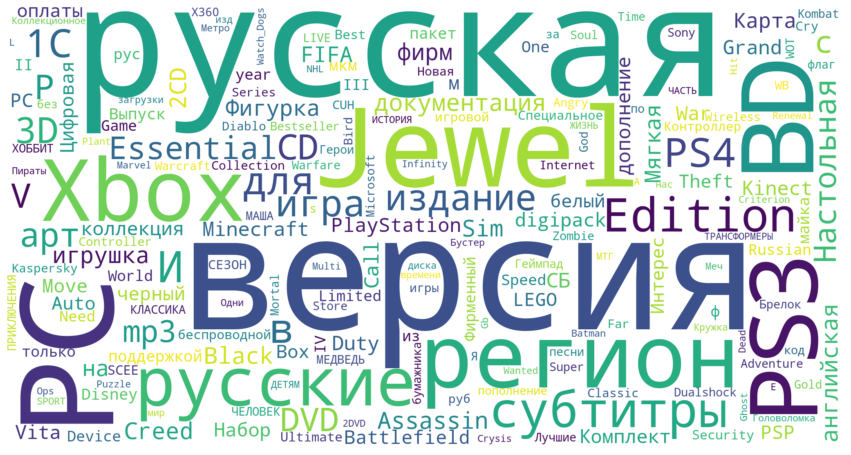

In [8]:
# Display the generated Word Cloud
plt.figure(figsize=[15,10])
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

<div style="color:white;display:fill;border-radius:8px;font-size:150%;
            font-family:cursive;letter-spacing:0.5px">
    <p style="padding: 8px;color:red;font-family: cursive;font-size: 20px"><b> Number of items in each categorie</b></p>
</div>

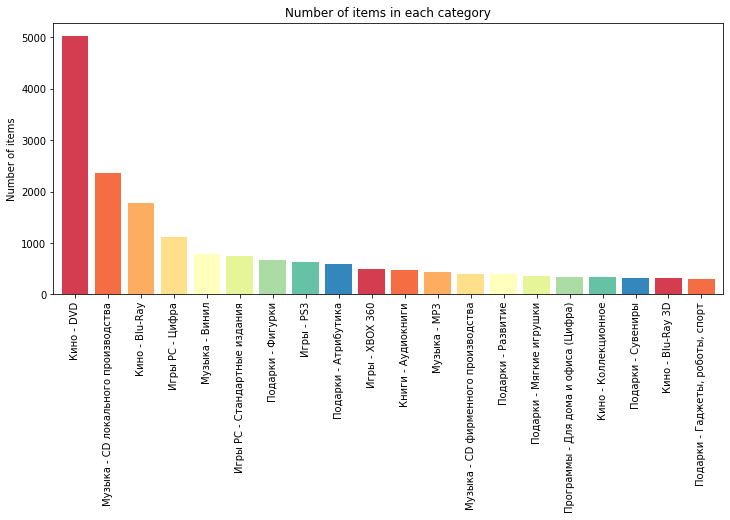

In [9]:
result=items_merged['item_category_name'].value_counts().sort_values(ascending=False)[0:20]
result.plot(kind='bar',figsize=(12,5),width = 0.8,color=sns.color_palette("Spectral", 9))
plt.title("Number of items in each category")
plt.ylabel('Number of items')
plt.show()

**<div>📌 As we can see : most of <mark style="background-color:yellow;color:red;border-radius:5px;opacity:0.9">items</mark> belong to the category <mark style="background-color:yellow;color:red;border-radius:5px;opacity:0.9">kИHO-DVD</mark> </div>**

<div style="color:white;display:fill;border-radius:8px;font-size:150%;
            font-family:cursive;letter-spacing:0.5px">
    <p style="padding: 8px;color:red;font-family: cursive;font-size: 20px"><b> Number of products sold in each category</b></p>
</div>

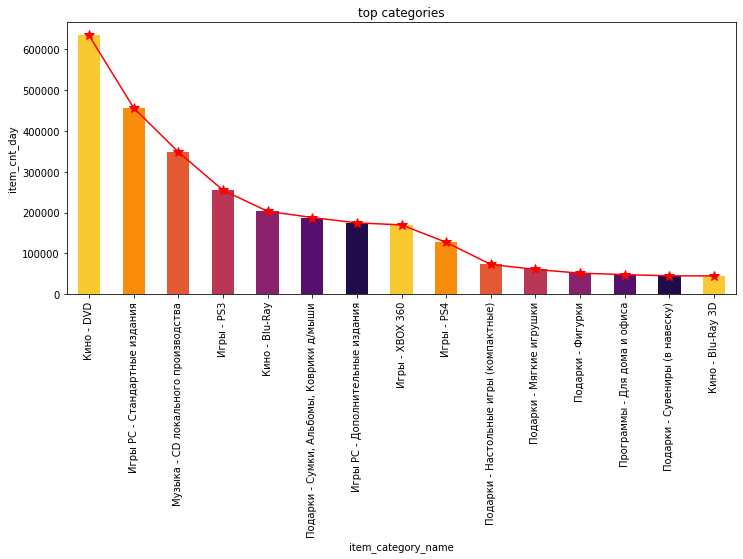

In [10]:
plt.figure(figsize=(12,5))
plt.title('top categories')
plt.ylabel('item_cnt_day')
sales_train_merged.groupby('item_category_name')['item_cnt_day'].sum().sort_values(ascending=False)[0:15].plot(kind='line', marker='*', color='red', ms=10)
sales_train_merged.groupby('item_category_name')['item_cnt_day'].sum().sort_values(ascending=False)[0:15].plot(kind='bar',color=sns.color_palette("inferno_r", 7))
plt.show()

**<div>📌 As we can see : most of <mark style="background-color:yellow;color:red;border-radius:5px;opacity:0.9">sold products</mark> belong to the category <mark style="background-color:yellow;color:red;border-radius:5px;opacity:0.9">kИHO-DVD</mark></div>**

<div style="color:white;display:fill;border-radius:8px;font-size:150%;
            font-family:cursive;letter-spacing:0.5px">
    <p style="padding: 8px;color:red;font-family: cursive;font-size: 20px"><b> Number of products sold in each Shop</b></p>
</div>

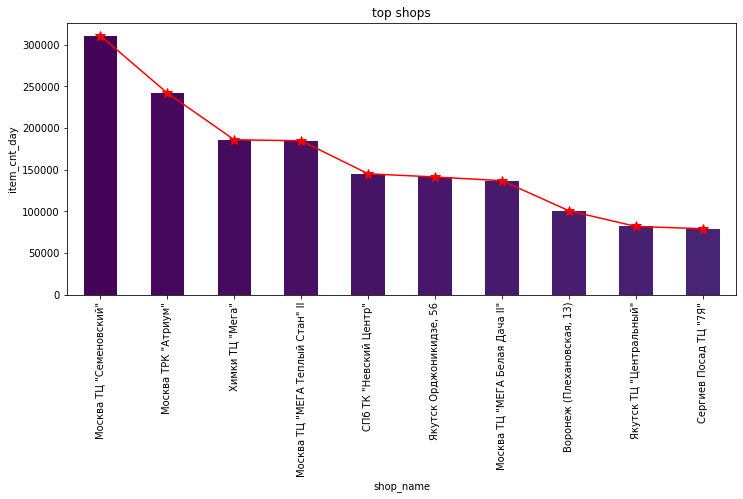

In [11]:
plt.figure(figsize=(12,5))
plt.title('top shops')
plt.ylabel('item_cnt_day')
sales_train_merged.groupby('shop_name')['item_cnt_day'].sum().sort_values(ascending=False)[0:10].plot(kind='line', marker='*', color='red', ms=10)
sales_train_merged.groupby('shop_name')['item_cnt_day'].sum().sort_values(ascending=False)[0:10].plot(kind='bar',color=sns.color_palette("viridis", 100))
plt.show()

**<div>📌 As we can see : most of <mark style="background-color:yellow;color:red;border-radius:5px;opacity:0.9">sold products</mark> are in the shop <mark style="background-color:yellow;color:red;border-radius:5px;opacity:0.9">Москва МТРЦ "Афи Молл"</mark></div>**

<div style="color:white;display:fill;border-radius:8px;font-size:150%;
            font-family:cursive;letter-spacing:0.5px">
    <p style="padding: 8px;color:red;font-family: cursive;font-size: 20px"><b> item_price in each category</b></p>
</div>

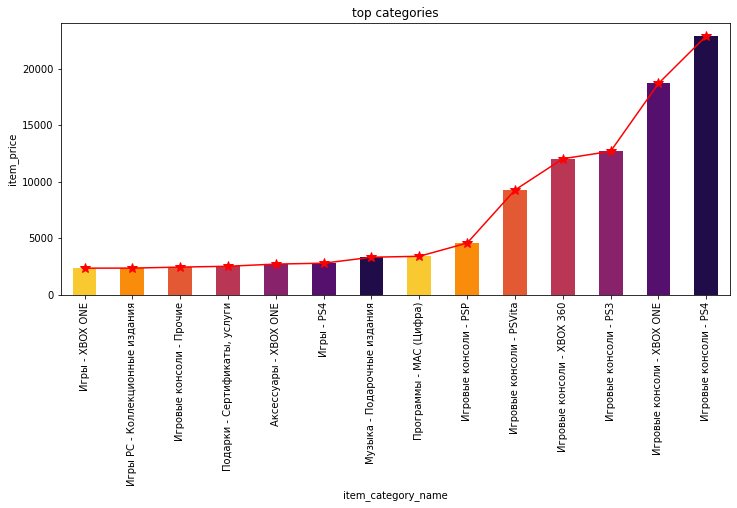

In [12]:
plt.figure(figsize=(12,5))
plt.title('top categories')
plt.ylabel('item_price')
sales_train_merged.groupby('item_category_name')['item_price'].mean().sort_values(ascending=True)[70:84].plot(kind='line', marker='*', color='red', ms=10)
sales_train_merged.groupby('item_category_name')['item_price'].mean().sort_values(ascending=True)[70:84].plot(kind='bar',color=sns.color_palette("inferno_r", 7))
plt.show()

**<div>📌 As we can see : The category <mark style="background-color:yellow;color:red;border-radius:5px;opacity:0.9">Игровые консоли - PS4</mark> is the most expensive category <mark style="background-color:yellow;color:red;border-radius:5px;opacity:0.9"></mark></div>**

<div style="color:white;display:fill;border-radius:8px;
            background-color:green;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>3.2 | Time series analysis ⏱</b></p>
</div>

<div style="color:white;display:fill;border-radius:8px;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:red;font-family: cursive;font-size: 20px"><b> Visualisation of daily sold products</b></p>
</div>

In [13]:
# Convert the date column to a datetime type
sales_train['date'] = sales_train['date'].apply(lambda x:datetime.datetime.strptime(x, '%d.%m.%Y'))
#save a copy of sales_train
df_train=sales_train.copy()
# Set the date column as the index of DataFrame 
sales_train=sales_train.set_index('date')

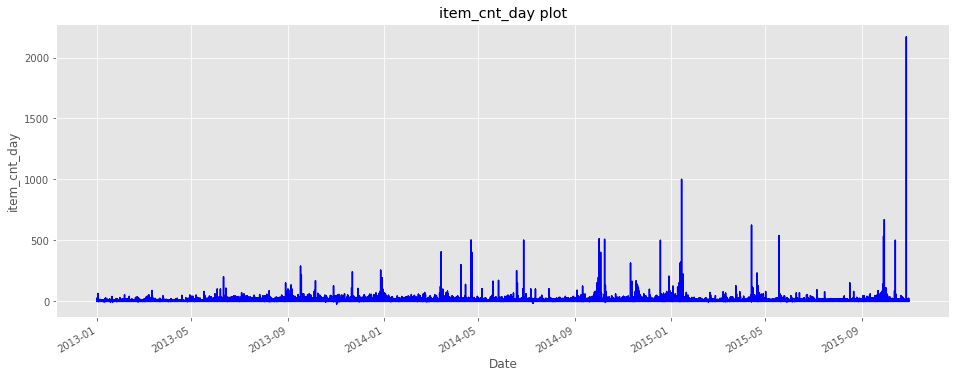

In [14]:
#Plot the time series 
# Use the ggplot style
plt.style.use('ggplot')
ax2 = sales_train['item_cnt_day'].plot(figsize=(16,6),color='blue')
# Set the title
ax2.set_title('item_cnt_day plot');
# Specify the x-axis label 
ax2.set_xlabel('Date')
# Specify the y-axis label 
ax2.set_ylabel('item_cnt_day')
plt.show()

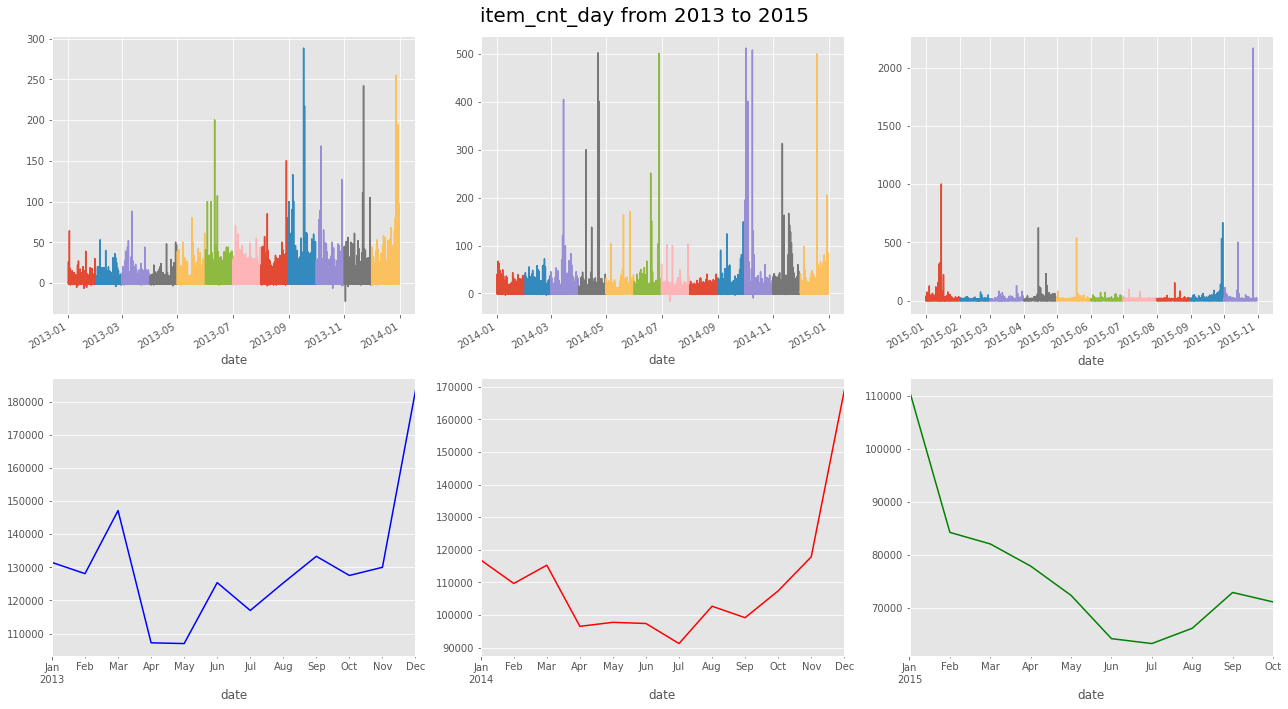

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
sales_train.loc['2013','item_cnt_day'].resample('M').plot(ax=ax[0,0])
sales_train.loc['2014','item_cnt_day'].resample('M').plot(ax=ax[0,1])
sales_train.loc['2015','item_cnt_day'].resample('M').plot(ax=ax[0,2])
sales_train.loc['2013','item_cnt_day'].resample('M').sum().plot( ax=ax[1,0],color='blue')
sales_train.loc['2014','item_cnt_day'].resample('M').sum().plot( ax=ax[1,1],color='red')
sales_train.loc['2015','item_cnt_day'].resample('M').sum().plot( ax=ax[1,2],color='green')
  
plt.suptitle('item_cnt_day from 2013 to 2015',fontsize=20)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.92, 
                    wspace=0.4, 
                    hspace=0.4)

fig.tight_layout()
plt.show()

<div style="color:white;display:fill;border-radius:8px;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:red;font-family: cursive;font-size: 20px"><b> Visualisation of monthly sold products</b></p>
</div>

In [16]:
df_train['month'] = df_train['date'].dt.to_period('M')
df_train['month'] = df_train['month'].astype(str)
dff2=df_train.copy()
df_train['month'] = pd.to_datetime(df_train['month'])

In [17]:
dff_train = df_train.groupby(['month']).agg({'item_cnt_day':'sum'})
dff_train['month'] = dff_train.index
dff_train.drop(['month'],axis=1,inplace=True)
dff_train.rename(columns = {'item_cnt_day':'item_cnt_month'}, inplace = True)

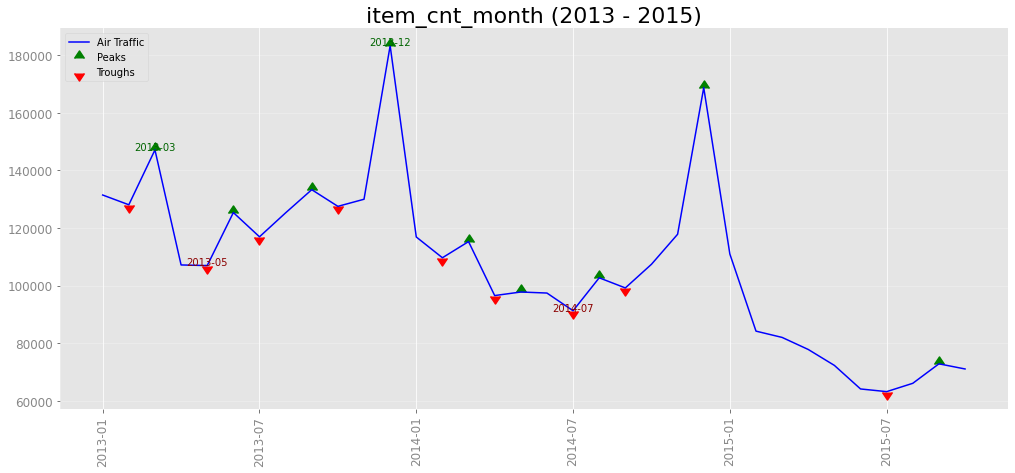

In [18]:
dff2=dff2.groupby(['month']).agg({'item_cnt_day':'sum'})
dff2['month'] = dff2.index
dff2.rename(columns = {'item_cnt_day':'item_cnt_month'}, inplace = True)
# Get the Peaks and Troughs
data = dff2['item_cnt_month'].values
doublediff = np.diff(np.sign(np.diff(data)))
peak_locations = np.where(doublediff == -2)[0] + 1

doublediff2 = np.diff(np.sign(np.diff(-1*data)))
trough_locations = np.where(doublediff2 == -2)[0] + 1

# Draw Plot
plt.figure(figsize=(17,7))
plt.plot('month', 'item_cnt_month', data=dff2, color='blue', label='Air Traffic')
plt.scatter(dff2.month[peak_locations], dff2.item_cnt_month[peak_locations], marker=mpl.markers.CARETUPBASE, color='green', s=100, label='Peaks')
plt.scatter(dff2.month[trough_locations], dff2.item_cnt_month[trough_locations], marker=mpl.markers.CARETDOWNBASE, color='red', s=100, label='Troughs')

# Annotate
for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    plt.text(dff2.month[p], dff2.item_cnt_month[p]+15, dff2.month[p], horizontalalignment='center', color='darkgreen')
    plt.text(dff2.month[t], dff2.item_cnt_month[t]-35, dff2.month[t], horizontalalignment='center', color='darkred')

# Decoration
xtick_location = dff2.index.tolist()[::6]
xtick_labels = dff2.month.tolist()[::6]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=12, alpha=.7)
plt.title("item_cnt_month (2013 - 2015)", fontsize=22)
plt.yticks(fontsize=12, alpha=.7)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

plt.legend(loc='upper left')
plt.grid(axis='y', alpha=.3)
plt.show()

<div style="color:white;display:fill;border-radius:8px;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:red;font-family: cursive;font-size: 20px"><b> Seasonality, Trend and Noise</b></p>
</div>

In [19]:
decomposition=seasonal_decompose(dff_train, model = 'additive')
# Extract the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal
sales_decomposed = pd.DataFrame(np.c_[trend, seasonal], index=dff_train.index, columns=['trend', 'seasonal'])

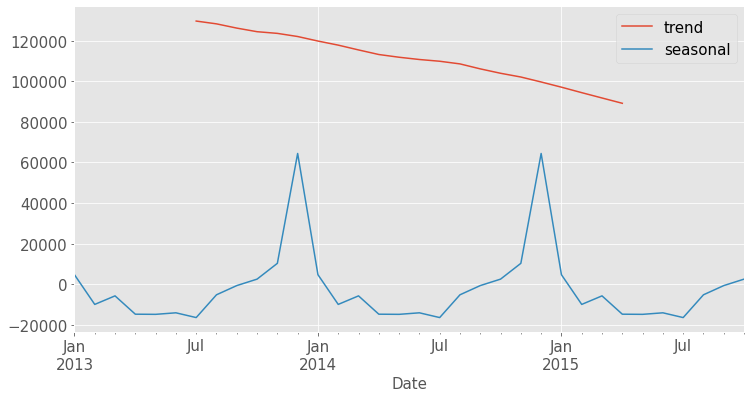

In [20]:
# Plot the values of the sales_decomposed DataFrame
ax = sales_decomposed.plot(figsize=(12, 6), fontsize=15)

# Specify axis labels
ax.set_xlabel('Date', fontsize=15)
plt.legend(fontsize=15)
plt.show()

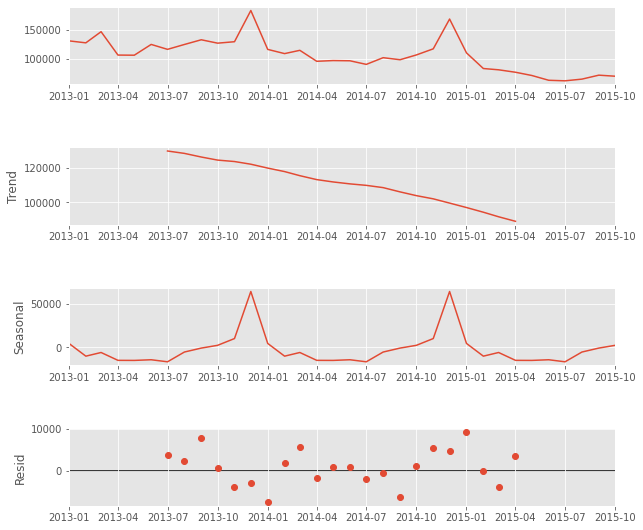

In [21]:
# seasonal_decompose for additive model
seasonal_decompose(dff_train, model = 'additive').plot().set_size_inches(10, 8)

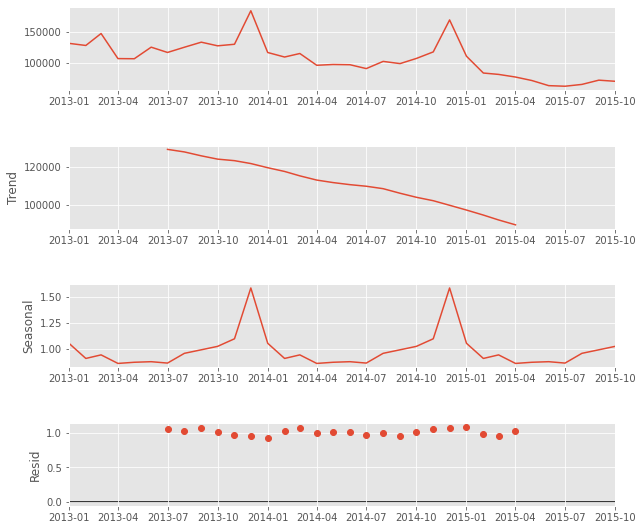

In [22]:
# seasonal_decompose for multiplicative model
seasonal_decompose(dff_train, model = 'multiplicative').plot().set_size_inches(10, 8)

# <b>4 <span style='color:green'>|</span> Futur Sales Forecasting with SARIMA model</b>

<div style="color:white;display:fill;border-radius:8px;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:red;font-family: cursive;font-size: 20px"><b> What is SARIMA?</b></p>
</div>
Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.

It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.
<div style="color:white;display:fill;border-radius:8px;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:red;font-family: cursive;font-size: 20px"><b> How to Configure SARIMA</b></p>
</div>
Configuring a SARIMA requires selecting hyperparameters for both the trend and seasonal elements of the series.<br>

<div style="color:white;display:fill;border-radius:8px;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:green;font-family: cursive;font-size: 20px;font-weight:bold"><b> Trend Elements</b></p>
</div>

There are three trend elements that require configuration.

They are the same as the ARIMA model; specifically:

* **p**: Trend autoregression order.
* **d**: Trend difference order.
* **q**: Trend moving average order.

<div style="color:white;display:fill;border-radius:8px;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:green;font-family: cursive;font-size: 20px;font-weight:bold"><b> Seasonal Elements</b></p>
</div>

There are four seasonal elements that are not part of ARIMA that must be configured; they are:

* **P**: Seasonal autoregressive order.
* **D**: Seasonal difference order.
* **Q**: Seasonal moving average order.
* **m**: The number of time steps for a single seasonal period.

<center><img src="https://www.researchgate.net/publication/284453153/figure/fig1/AS:393504565022720@1470830207599/Procedure-of-applying-ARIMA-model.png"></center>

<div style="color:white;display:fill;border-radius:8px;
            background-color:green;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>4.1 | Checks for Stationarity of the time serie</b></p>
</div>

 There are many methods to check whether a time series (direct observations, residuals, otherwise) is stationary or non-stationary. Here, i will use  Augmented Dickey Fuller test.<br>
The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.

In [23]:
result = adfuller(dff_train)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.395704
p-value: 0.142953
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616


 Since the p-value is greater than the critical value of 0.05, we can statistically confirm that the series is not stationary. To make this time serie stationnary with need to do differencing.

<div style="color:white;display:fill;border-radius:8px;
            background-color:green;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>4.2 | Differencing</b></p>
</div>

Almost by definition, it may be necessary to examine differenced data when we have seasonality. Seasonality usually causes the series to be nonstationary because the average values at some particular times within the seasonal span (months, for example) may be different than the average values at other times.

<div style="color:white;display:fill;border-radius:8px;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:red;font-family: cursive;font-size: 20px"><b> Seasonal differencing</b></p>
</div>

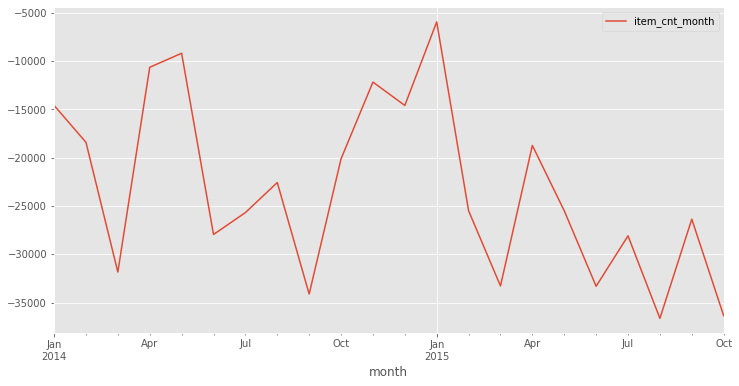

In [24]:
sd_dff_train=dff_train - dff_train.shift(12)
sd_dff_train = sd_dff_train.dropna()
sd_dff_train.plot(figsize=(12,6))
plt.show()

In [25]:
#ADF test
result = adfuller(sd_dff_train)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.270101
p-value: 0.016269


 The p-value is less than the critical value of 0.05. Hence we can confirm that the series is now stationary. We can say that D=1.

<div style="color:white;display:fill;border-radius:8px;
            background-color:green;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>4.3 | Autocorrelation in time series data</b></p>
</div>

 In order to figure out the parameters p,d,q,P,D,Q of SARIMA model we would need to plot the ACF and PACF plots.<br> ACF stands for Auto Correlation Function and PACF stands for Partial Auto Correlation Function.

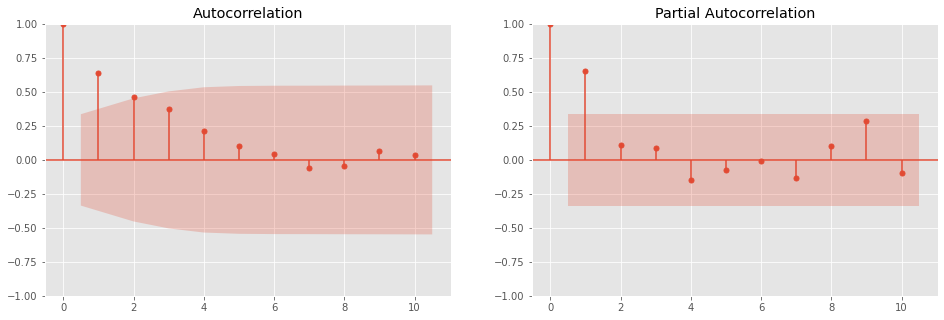

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
plot_acf(dff_train,lags=10, ax=axes[0])
plot_pacf(dff_train,lags=10, ax=axes[1])
plt.show()

<div style="color:white;display:fill;border-radius:8px;
            background-color:green;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>4.4 | Parameters estimation & model building</b></p>
</div>

In [27]:
model=auto_arima(dff_train, start_p = 0, start_q = 0,D=1, m = 12, seasonal = True, test = "adf",  trace = True, alpha = 0.05, information_criterion = 'aic', suppress_warnings = True, 
                    stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,1,1)[12]             : AIC=448.765, Time=0.30 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=451.736, Time=0.03 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=449.440, Time=0.11 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=438.095, Time=0.19 sec
 ARIMA(0,2,1)(0,1,0)[12]             : AIC=inf, Time=0.08 sec
 ARIMA(0,2,1)(1,1,1)[12]             : AIC=439.392, Time=0.31 sec
 ARIMA(0,2,1)(0,1,2)[12]             : AIC=inf, Time=0.91 sec
 ARIMA(0,2,1)(1,1,0)[12]             : AIC=438.173, Time=0.17 sec
 ARIMA(0,2,1)(1,1,2)[12]             : AIC=440.703, Time=0.48 sec
 ARIMA(0,2,0)(0,1,1)[12]             : AIC=448.622, Time=0.06 sec
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=inf, Time=0.25 sec
 ARIMA(0,2,2)(0,1,1)[12]             : AIC=451.418, Time=0.14 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=449.122, Time=0.09 sec
 ARIMA(1,2,2)(0,1,1)[12]             : AIC=inf, Time=0.58 sec
 ARIMA(0,2,1)(0,1,1)[12] intercept   : AIC=inf, T

 According to the algorithm the best SARIMA model is <b> SARIMA(0,2,1)(0,1,1)[12]</b> 

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   34
Model:             SARIMAX(0, 2, 1)x(0, 1, 1, 12)   Log Likelihood                -216.048
Date:                            Sat, 16 Jul 2022   AIC                            438.095
Time:                                    22:14:29   BIC                            441.082
Sample:                                         0   HQIC                           438.678
                                             - 34                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9856      0.298     -3.311      0.001      -1.569      -0.402
ma.S.L12      -0.0853      0.168     -0.509      0.611      -0.414       0.244
sigma2      2.062e+08   5.95e-10   3.46e+17      0.000    2.06e+08    2.06e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.75   Jarque-Bera (JB):                 0.89
Prob(Q):                              0.39   Prob(JB):                         0.64
Heteroskedasticity (H):               0.80   Skew:                             0.24
Prob(H) (two-sided):                  0.77   Kurtosis:                         2.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.6e+34. Standard errors may be unstable.
"""

### According to the model summary:

 *  Because the p-value of the Ljung-Box test is greater than 0.05, we cannot reject the null hypothesis that the residuals are independent.
 * Because the p-value of the heteroskedasticity test is grater than 0.05, we fail to reject the null hypothesis the null hypothesis of Homoscedasticity.
 *  Because the p-value of the Jarque Bera test is grater than 0.05, we fail to reject the null hypothesis and conclude that the sample data follows normal distribution.
 
**We conclude that residuals form a  white noise, so the the model is good and can be used for prediction.**
 

<div style="color:white;display:fill;border-radius:8px;
            background-color:green;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>4.5 | Diagnostics of residuals</b></p>
</div>

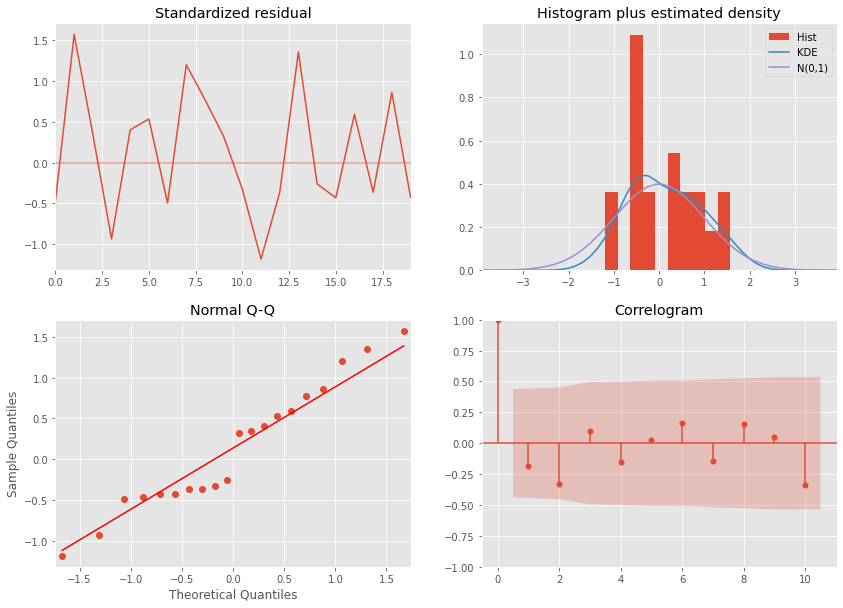

In [29]:
model.plot_diagnostics(figsize=(14,10))
plt.show()

<div style="color:white;display:fill;border-radius:8px;
            background-color:green;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>4.6 | Forcasting</b></p>
</div>

In [30]:
prediction, confint = model.predict(n_periods = 6, return_conf_int = True) #95% CI default
period_index = pd.period_range(start = dff_train.index[-1], periods = 6, freq='M')
forecast = pd.DataFrame({'Predicted item_cnt_month': prediction.round(2)}, index = period_index)
forecast

,Predicted item_cnt_month
2015-10,77890.54
2015-11,125725.12
2015-12,65654.02
2016-01,37681.17
2016-02,33348.92
2016-03,24889.97


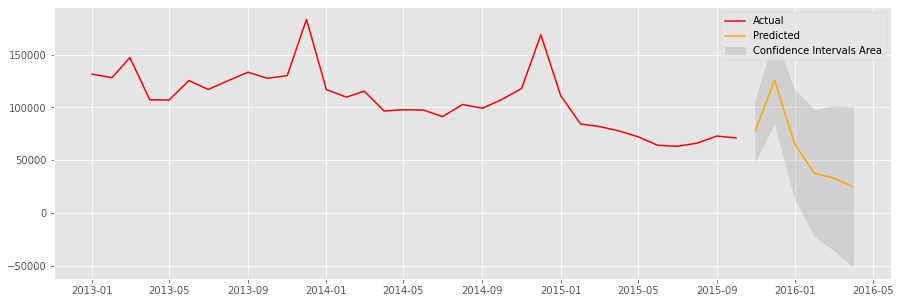

In [31]:
cf= pd.DataFrame(confint)
prediction_series = pd.Series(prediction,index=period_index)
plt.figure(figsize=(15, 5))
plt.plot(dff_train, color='red', label='Actual')
plt.plot(prediction_series, color='orange', label='Predicted')
plt.fill_between(prediction_series.index,
                cf[0],
                cf[1],color='grey',alpha=.2, label='Confidence Intervals Area')
plt.legend()
plt.show()

# <b>5 <span style='color:green'>|</span> Submission</b>

In [32]:
train_dfff = df_train.groupby(['shop_id', 'item_id'])['date', 'item_cnt_day'].agg({'item_cnt_day':'sum'})
train_dfff = train_dfff.reset_index()
print(train_dfff)

        shop_id  item_id  item_cnt_day
0             0       30          31.0
1             0       31          11.0
2             0       32          16.0
3             0       33           6.0
4             0       35          15.0
...         ...      ...           ...
424119       59    22154           1.0
424120       59    22155           1.0
424121       59    22162          16.0
424122       59    22164           6.0
424123       59    22167           4.0

[424124 rows x 3 columns]


In [33]:
test['item_cnt_month'] = (prediction[0].round(2)*len(test)/len(train_dfff))/len(test)
submission  = test.drop(['shop_id', 'item_id'], axis = 1)
print(submission)

            ID  item_cnt_month
0            0         0.18365
1            1         0.18365
2            2         0.18365
3            3         0.18365
4            4         0.18365
...        ...             ...
214195  214195         0.18365
214196  214196         0.18365
214197  214197         0.18365
214198  214198         0.18365
214199  214199         0.18365

[214200 rows x 2 columns]


In [34]:
submission.to_csv('submission.csv', index = False)